# Mental Health Prediction Using Machine Learning

The 2024 Kaggle Playground Series aims to provide engaging and practical datasets for machine learning enthusiasts to enhance their skills. This project focuses on Mental Health Prediction, using data from a mental health survey to analyze the factors that contribute to depression. The goal is to build a predictive model that determines whether an individual is experiencing depression based on various factors present in the dataset.

The dataset contains missing values, requiring preprocessing techniques such as data imputation and visualization for better insights. Various data analysis techniques, including count plots, pie charts, and correlation maps, will be used to understand the key contributing factors to depression.

## Project Objectives

The main objectives of this project are:

- Understand the Dataset – Perform an in-depth exploration of the provided training, testing, sample submission, and original data to gain insights into its structure and attributes.
- Handle Missing Values – Identify and impute missing values to ensure data quality and improve model performance.
- Data Visualization & Analysis – Generate multiple visualization plots (count plots, pie charts, heatmaps, etc.) to analyze key factors affecting mental health and depression.
- Model Implementation – Utilize various models predict depression based on survey responses.
- Enhance Model Performance – Implement grid serach to optimise hyper-parameters to refine predictions and improve the reliability of the model.
- Evaluate Results – Measure the model’s accuracy and effectiveness in classifying individuals with or without depression based on survey responses and make final model selection.

## Project Scope

<b>In-Scope:</b>

- Dataset Exploration – Understanding the data, missing values, and feature distributions.
- Data Preprocessing – Cleaning the dataset, handling missing values, and preparing it for modeling.
- Feature Engineering – Creating meaningful features from the dataset to enhance predictions.
- Data Visualization – Using plots and statistical analysis to explore depression risk factors.
- Model Selection & Implementation – Implementing different models for prediction.
- Performance Improvement – Using Grid Search for better accuracy.
- Prediction & Insights – Determining whether a person is at risk of depression based on analyzed factors.

<b>Out-of-Scope:</b>

- Medical Diagnosis – The project does not provide a medical diagnosis but rather a statistical analysis and prediction.
- Real-time Monitoring – The model will not be deployed for real-time monitoring of mental health conditions.
- Therapeutic Interventions – The project does not propose medical or psychological treatment solutions.

## Data Source

The dataset used in this project originates from the 2024 Kaggle Playground Series (Season 4, Episode 11) competition, titled "<a href="https://www.kaggle.com/competitions/playground-series-s4e11/overview">Exploring Mental Health Data</a>". The data was derived from the <a href="https://www.kaggle.com/datasets/sumansharmadataworld/depression-surveydataset-for-analysis">Depression Survey/Dataset</a> and has been augmented with synthetic data to increase its size.

The dataset consists of 234,500 observations, with a 6:4 train-test split. It contains 20 features, each representing different attributes related to an individual's mental health and well-being. The target variable, "Depression," is a binary flag (0 or 1) indicating whether an individual is experiencing depression.

<b>Understanding the Features</b>

<table border="1">
  <tr>
    <th><b>Column Name</b></th>
    <th><b>Description</b></th>
  </tr>
  <tr>
    <td>ID</td>
    <td>Unique identifier for each participant in the dataset</td>
  </tr>
  <tr>
    <td>Name</td>
    <td>Name of the participant</td>
  </tr>
  <tr>
    <td>Gender</td>
    <td>Gender of participant (listed as Male or Female)</td>
  </tr>
  <tr>
    <td>Age</td>
    <td>Age of the participant</td>
  </tr>
  <tr>
    <td>City</td>
    <td>The city that the participant resides</td>
  </tr>
  <tr>
    <td>Working Professional or Student</td>
    <td>Indicates whether the participant is a working professional or a student</td>
  </tr>
  <tr>
    <td>Profession</td>
    <td>Participant's profession or field of study</td>
  </tr>
  <tr>
    <td>Academic Pressure</td>
    <td>Level of pressure the participant's experiences in academics (on a scale of 1-5)</td>
  </tr>
  <tr>
    <td>Work Pressure</td>
    <td>Level of pressure the participant's experiences at their job (on a scale of 1-5)</td>
  </tr>
  <tr>
    <td>CGPA</td>
    <td>Cumulative Grade Point Average of the participant</td>
  </tr>
  <tr>
    <td>Study Satisfaction</td>
    <td>The participant's satisfaction with their studies (on a scale of 1-5)</td>
  </tr>
    </tr>
    <tr>
    <td>Job Satisfaction</td>
    <td>The participant's satisfaction with their jobs (on a scale of 1-5)</td>
  </tr>
  <tr>
    <td>Sleep Duration</td>
    <td>Average duration of sleep per night</td>
  </tr>
  <tr>
    <td>Dietary Habits</td>
    <td>Dietary habits of the participant (listed mainly as healthy, moderate and unhealthy)</td>
  </tr>
  <tr>
    <td>Degree</td>
    <td>Level of education the participant is pursuing or has completed</td>
  </tr>
  <tr>
    <td>Have you ever had suicidal thoughts?</td>
    <td>Indicates whether the participant has ever had suicidal thoughts (listed as yes or no)</td>
  </tr>
  <tr>
    <td>Work/Study Hours</td>
    <td>Number of hours the participant spends working or studying per day on average</td>
  </tr>
  <tr>
    <td>Financial Stress</td>
    <td>Level of financial stress the participant experiences (on a scale of 1-5)</td>
  </tr>
  <tr>
    <td>Family History of Mental Illness</td>
    <td>Indicates whether the participant has a family history of mental illness (listed as yes or no)</td>
  </tr>
  <tr>
    <td>Depression</td>
    <td>The participant's depression status (listed as 0 or 1)</td>
  </tr>
</table>

## Other Sources

Inspirations taken from the following Kaggle Notebooks:
- <a href="https://www.kaggle.com/code/annastasy/mental-health-eda-ensemble/notebook">Mental Health EDA by Anna Balatska</a>
- <a href="https://www.kaggle.com/code/marianadeem755/mental-health-key-insights-predictions-unveiled/notebook#CatBoost-Model-Implementation">Mental Health: Key Insights & Predictions Unveiled by Maria Nadeem</a>
- <a href="https://www.kaggle.com/code/negmgh/evaluating-mental-health-data">Evaluating Mental Health Data by Negin Noghadasi, PH. D</a>

## Step 1. Environment Set-Up and Data Import

In [1]:
#!pip install xboost catboost

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV

In [2]:
# data import
train = pd.read_csv("/workspaces/myfolder/MentalHealth_Workbench/data/train.csv")
#test = pd.read_csv("/workspaces/myfolder/MentalHealth_Workbench/data/test.csv")

## Step 2. Exploratory Data Analysis

Exploratory data analysis (EDA) is crucial in data science projects because it helps us understand the structure and characteristics of the data we're working with. By exploring variables, identifying patterns, detecting anomalies, and visualizing relationships, EDA enables us to make informed decisions about data preprocessing, feature engineering, and model selection. It also plays a key role in uncovering insights and formulating hypotheses, laying the groundwork for more accurate modeling and impactful conclusions.

In [3]:
print("First 5 rows of dataset:")
train.head()

First 5 rows of dataset:


,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0


In [4]:
print(f"There are {train.shape[1]} columns and {train.shape[0]} rows in the train dataset.")

There are 20 columns and 140700 rows in the train dataset.


In [5]:
print("Column names and data type of each column:")
train.dtypes

Column names and data type of each column:


id                                         int64
Name                                      object
Gender                                    object
Age                                      float64
City                                      object
Working Professional or Student           object
Profession                                object
Academic Pressure                        float64
Work Pressure                            float64
CGPA                                     float64
Study Satisfaction                       float64
Job Satisfaction                         float64
Sleep Duration                            object
Dietary Habits                            object
Degree                                    object
Have you ever had suicidal thoughts ?     object
Work/Study Hours                         float64
Financial Stress                         float64
Family History of Mental Illness          object
Depression                                 int64
dtype: object

Note that there is a mix of numerical and string data types, and understand that the string features are categorical or boolean, hence should be treated with techniques such as encoding to ensure optimal model performance.

In [6]:
print("Summary statistics for the numeric columns:")
train.describe()

Summary statistics for the numeric columns:


,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,Depression
count,140700.000000,140700.000000,27897.000000,112782.000000,27898.000000,27897.000000,112790.000000,140700.000000,140696.000000,140700.000000
mean,70349.500000,40.388621,3.142273,2.998998,7.658636,2.944940,2.974404,6.252679,2.988983,0.181713
std,40616.735775,12.384099,1.380457,1.405771,1.464466,1.360197,1.416078,3.853615,1.413633,0.385609
min,0.000000,18.000000,1.000000,1.000000,5.030000,1.000000,1.000000,0.000000,1.000000,0.000000
25%,35174.750000,29.000000,2.000000,2.000000,6.290000,2.000000,2.000000,3.000000,2.000000,0.000000
50%,70349.500000,42.000000,3.000000,3.000000,7.770000,3.000000,3.000000,6.000000,3.000000,0.000000
75%,105524.250000,51.000000,4.000000,4.000000,8.920000,4.000000,4.000000,10.000000,4.000000,0.000000
max,140699.000000,60.000000,5.000000,5.000000,10.000000,5.000000,5.000000,12.000000,5.000000,1.000000


Range of each numeric variable is correct and we see no outliers.

Checking for missing values in each column:
id                                            0
Name                                          0
Gender                                        0
Age                                           0
City                                          0
Working Professional or Student               0
Profession                                36630
Academic Pressure                        112803
Work Pressure                             27918
CGPA                                     112802
Study Satisfaction                       112803
Job Satisfaction                          27910
Sleep Duration                                0
Dietary Habits                                4
Degree                                        2
Have you ever had suicidal thoughts ?         0
Work/Study Hours                              0
Financial Stress                              4
Family History of Mental Illness              0
Depression                                  

<Axes: title={'center': 'Visualizing Missing Values'}>

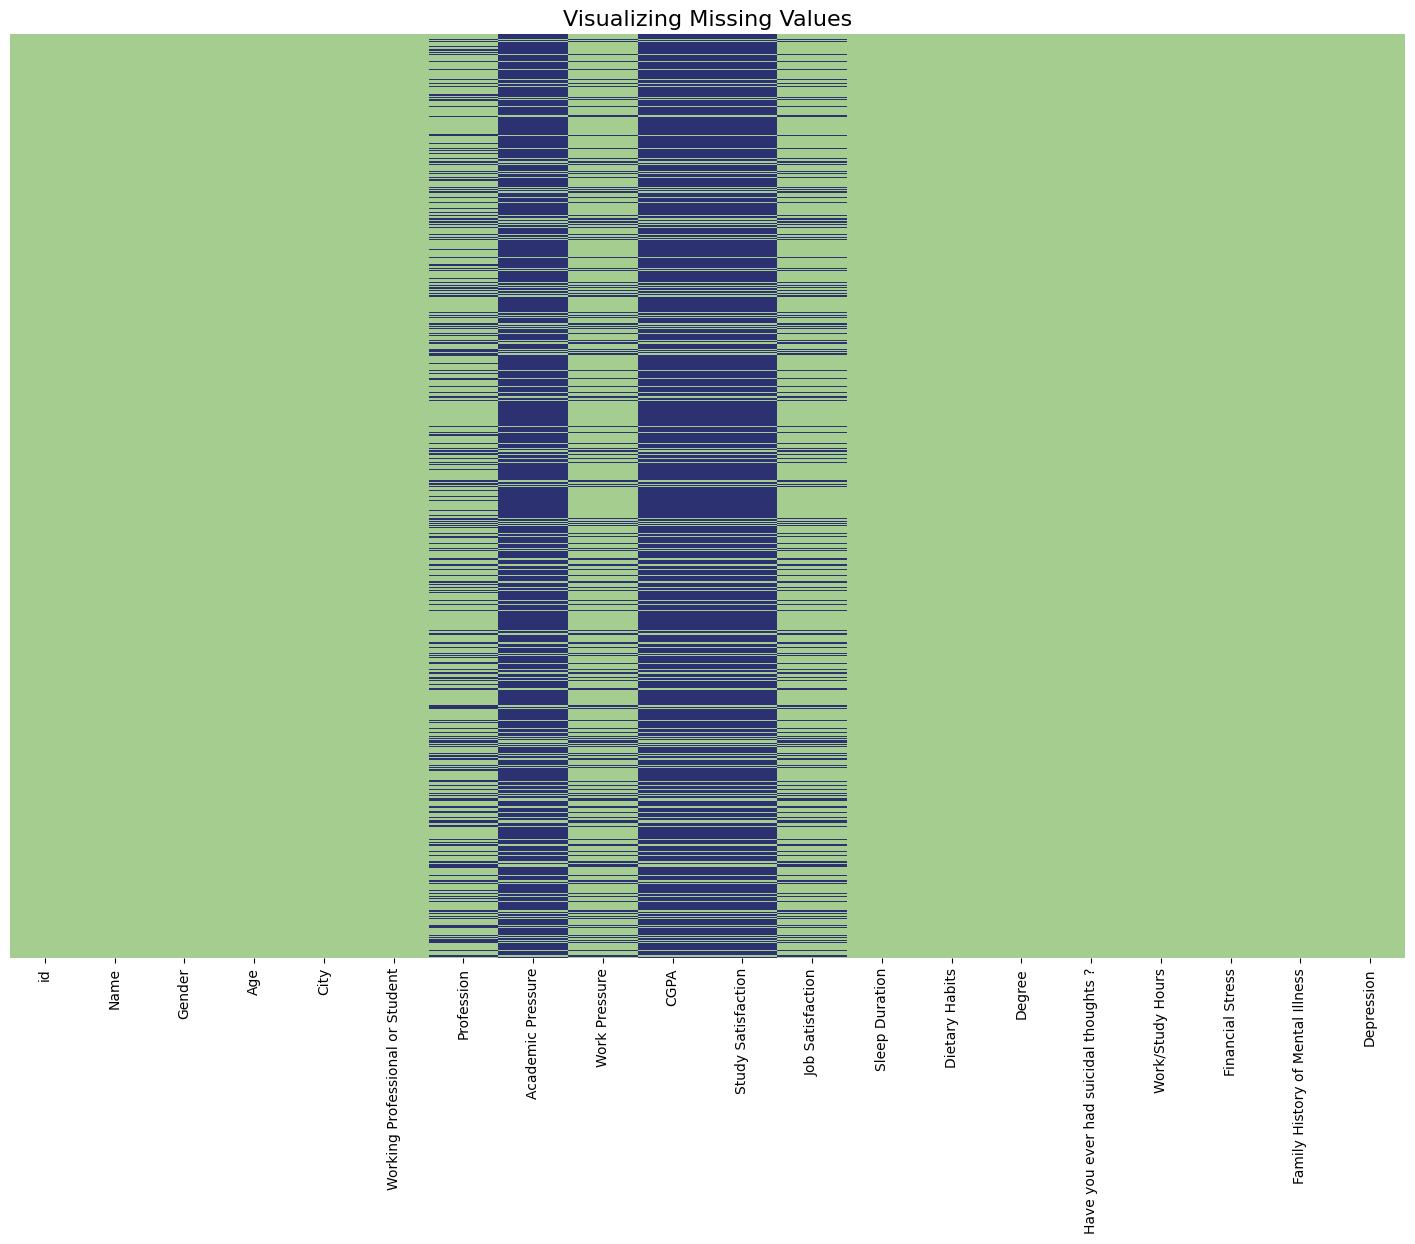

In [7]:
print("Checking for missing values in each column:")
print(train.isnull().sum())

plt.figure(figsize=(18,12))
plt.title("Visualizing Missing Values", fontsize=16)
sns.heatmap(train.isnull(), cmap="crest", cbar=False, yticklabels=False)

Between the frequency table and the distribuiton heatmap of missing values, we see that majority of missing values are concentrated in the center few variables. However, we are able to see that for those observations missing in academic pressure will have work pressure filled out, hence we could combine these two variables and use the 'Working Porfessional or Student' flag to account for the difference. Same logic could be applied to study and job satisfaction

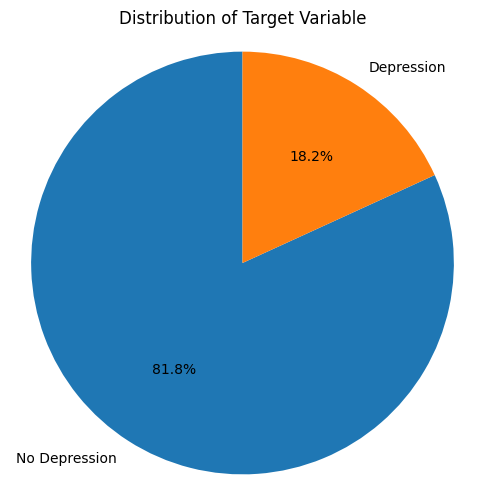

In [8]:
# Distribution of Depression
class_counts = train["Depression"].value_counts().sort_index()
labels = ["No Depression", "Depression"]
plt.figure(figsize=(6, 6))
plt.pie(class_counts, labels=labels,
        autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Target Variable')
plt.axis('equal')

plt.show()

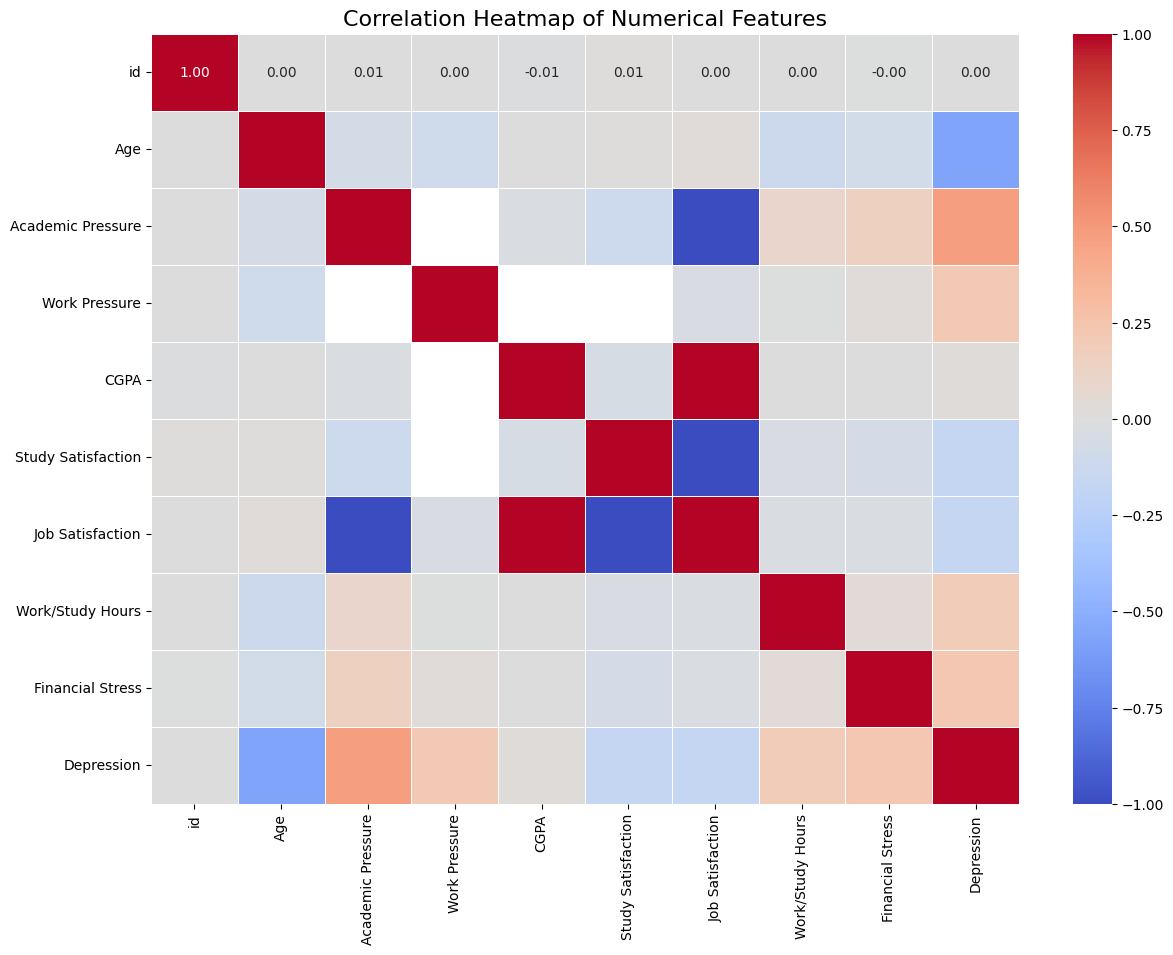

In [9]:
# Calculate the correlation matrix
correlation_matrix = train.corr(numeric_only=True)

# Set up the figure size
plt.figure(figsize=(14, 10))

# Create a heatmap with custom styling
sns.heatmap(correlation_matrix, 
            annot=True,        # Display correlation values
            fmt=".2f",         # Format values to 2 decimal places
            cmap="coolwarm",   # Color scheme: Blue (negative) to Red (positive)
            linewidths=0.5,    # Add grid lines for better readability
            cbar=True)         # Show the color bar

# Set the title
plt.title("Correlation Heatmap of Numerical Features", fontsize=16)

# Show the heatmap
plt.show()

## Step 3. Data Transformation/Wrangling

Data wrangling is essential in the model creation cycle as it ensures data quality, prepares data for modeling techniques, uncovers insights, and supports reproducibility. It forms the foundation upon which accurate, reliable, and actionable models can be derived from data in the field of data science. These steps are done based on what our exploratory data analysis (EDA) uncovered. In this case, we will be imputing our missing variables, encoding our categorical variables, and splitting our dataset for testing and training.

In [10]:
# create copy of train df
train_clean = train.copy()

In [11]:
# Missing value treatment
# Merging the Pressure and Satisfaction columns

# Impute missing values in "Work/Study Pressure" with values from "Work Pressure"
train_clean["Work/Study Pressure"] = train_clean["Academic Pressure"].copy().fillna(train_clean["Work Pressure"])

# Impute missing values in "Work/Study Satisfaction" with values from "Job Satisfaction"
train_clean["Work/Study Satisfaction"] = train_clean["Study Satisfaction"].copy().fillna(train_clean["Job Satisfaction"])

In [12]:
train_clean['Sleep Duration'].unique()

array(['More than 8 hours', 'Less than 5 hours', '5-6 hours', '7-8 hours',
       'Sleep_Duration', '1-2 hours', '6-8 hours', '4-6 hours',
       '6-7 hours', '10-11 hours', '8-9 hours', '40-45 hours',
       '9-11 hours', '2-3 hours', '3-4 hours', 'Moderate', '55-66 hours',
       '4-5 hours', '9-6 hours', '1-3 hours', 'Indore', '45', '1-6 hours',
       '35-36 hours', '8 hours', 'No', '10-6 hours', 'than 5 hours',
       '49 hours', 'Unhealthy', 'Work_Study_Hours', '3-6 hours',
       '45-48 hours', '9-5', 'Pune', '9-5 hours'], dtype=object)

In [13]:
# Define a mapping dictionary with estimated average sleep duration
sleep_duration_map = {
    'Less than 5 hours': 4.5,
    'than 5 hours': 4.5,  # Possible typo
    '1-2 hours': 1.5,
    '2-3 hours': 2.5,
    '3-4 hours': 3.5,
    '4-5 hours': 4.5,
    '4-6 hours': 5.0,
    '5-6 hours': 5.5,
    '6-7 hours': 6.5,
    '6-8 hours': 7.0,
    '7-8 hours': 7.5,
    '8-9 hours': 8.5,
    '9-11 hours': 10.0,
    '10-11 hours': 10.5,
    '8 hours': 8.0,
    '9-6 hours': 7.5,  # Likely meant as a time range
    '9-5': 7.5,  # Likely a typo
    '9-5 hours': 7.5,
    '10-6 hours': 8.0,
    'More than 8 hours': 9.0,
    '45': 6.5, # divided by 7
    '49 hours': 7, # divided by 7
    '35-36 hours': 5, # divided by 7
    '40-45 hours': 6, # divided by 7
    '45-48 hours': 6.5, # divided by 7
    '55-66 hours': 8.5, # divided by 7
    
    # Possible erroneous entries replaced with NaN
    'Moderate': np.nan,
    'Unhealthy': np.nan,
    'Indore': np.nan,
    'Pune': np.nan,
    'No': np.nan,
    'Work_Study_Hours': np.nan,
    'Sleep_Duration': np.nan  # Column header mistakenly included

}

# Replace the categories with numerical values
train_clean['Sleep Hours'] = train_clean['Sleep Duration'].map(sleep_duration_map)

# impute missing with median value
train_clean['Sleep Hours'] = train_clean['Sleep Hours'].fillna(train_clean['Sleep Hours'].median())

# Display the unique mapped values
print(train_clean['Sleep Hours'].unique())

[ 9.   4.5  5.5  7.5  1.5  7.   5.   6.5 10.5  8.5  6.  10.   2.5  3.5
  8. ]


In [14]:
train_clean['Dietary Habits'].unique()

array(['Healthy', 'Unhealthy', 'Moderate', 'Yes', 'Pratham', 'BSc',
       'Gender', '3', 'More Healthy', 'Less than Healthy', 'Mihir', '1.0',
       'Hormonal', 'Electrician', nan, 'No Healthy', 'Less Healthy',
       'M.Tech', 'Vegas', 'No', 'Male', 'Indoor', 'Class 12', '2'],
      dtype=object)

In [15]:
# Create mapping dictionary
diet_mapping = {
    'Healthy': 'Healthy',
    'More Healthy': 'Healthy',
    'Unhealthy': 'Unhealthy',
    'Less than Healthy': 'Unhealthy',
    'No Healthy': 'Unhealthy',
    'Less Healthy': 'Unhealthy',
    'Moderate': 'Moderate'
}

# Apply mapping
train_clean['Dietary Habits'] = train_clean['Dietary Habits'].map(diet_mapping)

# impute missing with median value
train_clean['Dietary Habits'] = train_clean['Dietary Habits'].fillna("Unknown")

# Display the unique mapped values
print(train_clean['Dietary Habits'].unique())

['Healthy' 'Unhealthy' 'Moderate' 'Unknown']


In [16]:
# Create new features- transforming to boolean features
train_clean['Is_Student'] = (train_clean['Working Professional or Student'] == 'Student').astype(int)
train_clean['Has_Family_History'] = (train_clean['Family History of Mental Illness'] == 'Yes').astype(int)
train_clean['Has_Suicidal_Thoughts'] = (train_clean['Have you ever had suicidal thoughts ?'] == 'Yes').astype(int)

# Age groups- categorising Age
train_clean['Age_Group'] = pd.cut(train_clean['Age'], 
                            bins=[0, 25, 35, 45, 55, 100],
                            labels=['18-25', '26-35', '36-45', '46-55', '55+'])

In [17]:
# Encode categorical variables
categorical_columns = ['Gender', 'City', 'Profession', 'Dietary Habits', 'Degree', 'Age_Group']

label_encoders = {}

for column in categorical_columns:
    le = LabelEncoder()
    train_clean[f'{column}_Encoded'] = le.fit_transform(train_clean[column].astype(str))
    label_encoders[column] = le

In [18]:
train_clean.columns

Index(['id', 'Name', 'Gender', 'Age', 'City',
       'Working Professional or Student', 'Profession', 'Academic Pressure',
       'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction',
       'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression',
       'Work/Study Pressure', 'Work/Study Satisfaction', 'Sleep Hours',
       'Is_Student', 'Has_Family_History', 'Has_Suicidal_Thoughts',
       'Age_Group', 'Gender_Encoded', 'City_Encoded', 'Profession_Encoded',
       'Dietary Habits_Encoded', 'Degree_Encoded', 'Age_Group_Encoded'],
      dtype='object')

In [19]:
# Feature Selection
# dropping old pressure and satisfaction columns
# dropping id and name columns because do not need identifiers to model
# dropping CGPA because very weak correlation and lot of missing values
# dropping columns that have been encoded
train_clean = train_clean.drop(['id', 'Name', 'Gender', 'Age', 'City', 'Working Professional or Student', 'Profession',
        'Academic Pressure', 'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction', 'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 'Family History of Mental Illness', 'Age_Group'], axis=1)

print(train_clean.isnull().sum())

Work/Study Hours            0
Financial Stress            4
Depression                  0
Work/Study Pressure        21
Work/Study Satisfaction    15
Sleep Hours                 0
Is_Student                  0
Has_Family_History          0
Has_Suicidal_Thoughts       0
Gender_Encoded              0
City_Encoded                0
Profession_Encoded          0
Dietary Habits_Encoded      0
Degree_Encoded              0
Age_Group_Encoded           0
dtype: int64


In [20]:
# Drop observations with missing values
train_clean = train_clean.dropna()

print(train_clean.isnull().sum())
print("Cleaned train data shape:", train_clean.shape)

Work/Study Hours           0
Financial Stress           0
Depression                 0
Work/Study Pressure        0
Work/Study Satisfaction    0
Sleep Hours                0
Is_Student                 0
Has_Family_History         0
Has_Suicidal_Thoughts      0
Gender_Encoded             0
City_Encoded               0
Profession_Encoded         0
Dietary Habits_Encoded     0
Degree_Encoded             0
Age_Group_Encoded          0
dtype: int64
Cleaned train data shape: (140667, 15)


In [21]:
train_clean.dtypes

Work/Study Hours           float64
Financial Stress           float64
Depression                   int64
Work/Study Pressure        float64
Work/Study Satisfaction    float64
Sleep Hours                float64
Is_Student                   int64
Has_Family_History           int64
Has_Suicidal_Thoughts        int64
Gender_Encoded               int64
City_Encoded                 int64
Profession_Encoded           int64
Dietary Habits_Encoded       int64
Degree_Encoded               int64
Age_Group_Encoded            int64
dtype: object

## Step 4: Modelling

Modeling in the data science process involves the application of machine learning algorithms to analyze data, make predictions, or uncover patterns. It is a pivotal phase where the insights gleaned from data are translated into actionable decisions and solutions.

Machine learning models are employed to address various tasks, such as classification, regression, clustering, and recommendation systems, depending on the nature of the problem at hand. These models learn from historical data to generalize patterns and make predictions on new, unseen data.

In [22]:
def train_model(df, target, model_design):
    """Train the model using CatBoost"""
    features = df.columns.drop(target)
    X = df[features]
    y = df[target]

    X_train, X_val, y_train, y_val = train_test_split(X, y, 
                                                      test_size=0.2, 
                                                      random_state=42,
                                                      stratify=y)
        
    # Initialize and train CatBoost model
    model = model_design
        
    model.fit(X_train, y_train)
        
    # Make predictions on validation set
    val_preds = model.predict(X_val)
      
    # Print classification report
    print("\nClassification Report for", model_design.__class__.__name__, "Model:")
    print(classification_report(y_val, val_preds))

In [23]:
train_model(train_clean, 'Depression', CatBoostClassifier(
    iterations=500,
    learning_rate=0.05,
    depth=6,
    loss_function='Logloss',
    random_seed=42,
    verbose=100
        ))

train_model(train_clean, 'Depression', RandomForestClassifier(
    n_estimators=100,
    max_depth=6,
    random_state=42
))


train_model(train_clean, 'Depression', XGBClassifier(
    max_depth=6,
    learning_rate=0.05,
    n_estimators=100,
    random_state=42
))

train_model(train_clean, 'Depression', MLPClassifier(
    hidden_layer_sizes=(35, 16),
    max_iter=500,
    random_state=42
))

0:	learn: 0.6037100	total: 67.7ms	remaining: 33.8s
100:	learn: 0.1568101	total: 1.45s	remaining: 5.74s
200:	learn: 0.1522959	total: 3.27s	remaining: 4.86s
300:	learn: 0.1500326	total: 5.09s	remaining: 3.37s
400:	learn: 0.1480289	total: 6.86s	remaining: 1.69s
499:	learn: 0.1462552	total: 8.74s	remaining: 0us

Classification Report for CatBoostClassifier Model:
              precision    recall  f1-score   support

           0       0.96      0.97      0.96     23023
           1       0.85      0.81      0.83      5111

    accuracy                           0.94     28134
   macro avg       0.90      0.89      0.90     28134
weighted avg       0.94      0.94      0.94     28134


Classification Report for RandomForestClassifier Model:
              precision    recall  f1-score   support

           0       0.94      0.97      0.96     23023
           1       0.85      0.73      0.78      5111

    accuracy                           0.93     28134
   macro avg       0.89      0.85   

## Step 5: Model Tuning

In [24]:
def hyper_tune_catboost(df, target):
    """Hyper-tune the CatBoost model using GridSearchCV"""
    # Separate features and target
    features = df.columns.drop(target)
    X = df[features]
    y = df[target]

    # Train-validation split
    X_train, X_val, y_train, y_val = train_test_split(X, y, 
                                                      test_size=0.2, 
                                                      random_state=42,
                                                      stratify=y)

    # Define the parameter grid
    param_grid = {
        'iterations': [100, 300, 500],        # Number of boosting iterations
        'learning_rate': [0.01, 0.05, 0.1],  # Learning rate
        'depth': [4, 6, 8],                  # Depth of trees
        'l2_leaf_reg': [1, 3, 5],            # Regularization strength
    }

    # Initialize CatBoostClassifier
    model = CatBoostClassifier(
        loss_function='Logloss',
        random_seed=42,
        verbose=0,  # Suppress training logs for GridSearch
    )

    # Initialize GridSearchCV
    grid_search = GridSearchCV(estimator=model, 
                               param_grid=param_grid, 
                               cv=3,  # 3-fold cross-validation
                               scoring='accuracy',  # Metric to optimize
                               verbose=2, 
                               n_jobs=-1)  # Use all CPU cores

    # Fit GridSearchCV
    grid_search.fit(X_train, y_train)

    # Best hyperparameters
    print("Best Parameters:", grid_search.best_params_)

    # Evaluate the best model on the validation set
    best_model = grid_search.best_estimator_
    val_preds = best_model.predict(X_val)
    print("\nClassification Report for Best CatBoost Model:")
    print(classification_report(y_val, val_preds))

    return best_model, grid_search.best_params_

In [25]:
best_model, best_params = hyper_tune_catboost(train_clean, 'Depression')

Fitting 3 folds for each of 81 candidates, totalling 243 fits
[CV] END depth=4, iterations=100, l2_leaf_reg=1, learning_rate=0.01; total time=   1.3s
[CV] END depth=4, iterations=100, l2_leaf_reg=1, learning_rate=0.01; total time=   1.3s
[CV] END depth=4, iterations=100, l2_leaf_reg=1, learning_rate=0.01; total time=   1.2s
[CV] END depth=4, iterations=100, l2_leaf_reg=1, learning_rate=0.05; total time=   1.3s
[CV] END depth=4, iterations=100, l2_leaf_reg=1, learning_rate=0.05; total time=   1.3s
[CV] END depth=4, iterations=100, l2_leaf_reg=1, learning_rate=0.05; total time=   1.3s
[CV] END depth=4, iterations=100, l2_leaf_reg=1, learning_rate=0.1; total time=   1.3s
[CV] END depth=4, iterations=100, l2_leaf_reg=1, learning_rate=0.1; total time=   1.2s
[CV] END depth=4, iterations=100, l2_leaf_reg=1, learning_rate=0.1; total time=   1.3s
[CV] END depth=4, iterations=100, l2_leaf_reg=3, learning_rate=0.01; total time=   1.2s
[CV] END depth=4, iterations=100, l2_leaf_reg=3, learning_rat

In [26]:
print(best_model, best_params)

<catboost.core.CatBoostClassifier object at 0x7f919bcc3050> {'depth': 4, 'iterations': 300, 'l2_leaf_reg': 5, 'learning_rate': 0.1}


## Step 6: Model Evaluation and Selection

Model evaluation and comparison are indispensable in the data science process as they validate the effectiveness and reliability of predictive models. By systematically evaluating models against relevant metrics such as accuracy, precision, recall, and F1-score, data scientists can assess which models perform best for specific tasks and datasets. This process not only ensures the chosen model meets desired performance criteria but also identifies potential weaknesses or biases that could impact its real-world application. Moreover, comparing different models allows data scientists to make informed decisions, selecting the most suitable model that balances accuracy, interpretability, and computational efficiency.

## Step 7: Saving Your Model

## Future Work

* Models built on Workbench, whether they are scikit-learn models or SAS Viya ML models can be registered into the model repository on Viya (SAS Model Manager). This is a crucial step in ensuring that models can be goverened properly as corporate assets before being pushed into production.